## Experiments analysis

This notebook was used to run experiments on Colab and compare the results for picking the model hyperparameters.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# %cd to the location on drive or local instance where the 'roof-top-segementaton-challenge' repo has been copied

# %cd /content/drive/MyDrive/Colab_Notebooks/roof_top_task_repo/roof-top-segmenation-challenge

In [ ]:
%cd src

In [4]:
#!git stash

In [5]:
#!git pull 

Already up to date.


In [ ]:
!python main.py

## Compare results and learning curves

Gather the config and average result metrics in a pandas dataframe and plot the learning curves for selected experiments

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import matplotlib.image as mpimg
import json

In [38]:
LOG_ROOT_DIR = Path('../models/')
experiments = range(1,len(list(Path(LOG_ROOT_DIR).glob('*'))))

In [39]:
# show config of the experiments
df_dict = {}
df_dict['experiment_num'] = []
df_dict['learning_rate'] = []
df_dict['threshold'] = []
df_dict['loss_function'] = []
df_dict['weight'] = []
df_dict['num_epochs'] = []
df_dict['seed'] = []
val_metrics = pd.read_json(LOG_ROOT_DIR / 'experiment_1' / 'val_predictions' / 'metrics.json')

for col in val_metrics.columns:
  if 'mean' in col:
    df_dict[f'val_{col}'] = []
    df_dict[f'train_{col}'] = []

for i in range(len(experiments)):
  df_dict['experiment_num'].append(i+1)
  
  with open(LOG_ROOT_DIR / f'experiment_{i+1}' / 'config.json', 'r') as file:
     config = json.loads(file.read())
     df_dict['learning_rate'].append(config['lr'])
     df_dict['loss_function'].append(config['loss'])
     try:
       df_dict['weight'].append(config['weight'])
     except KeyError:
       df_dict['weight'].append(0)
     df_dict['threshold'].append(config['threshold'])
     df_dict['num_epochs'].append(config['num epochs'])
     df_dict['seed'].append(config['seed'])


  with open(LOG_ROOT_DIR / f'experiment_{i+1}' / 'val_predictions' / 'metrics.json', 'r') as file:
    val_metrics = json.loads(file.read())
  
  with open(LOG_ROOT_DIR / f'experiment_{i+1}' / 'train_predictions' / 'metrics.json') as file:
    train_metrics = json.loads(file.read())

  for col in val_metrics:
    if 'mean' in col:
      df_dict[f'val_{col}'].append(val_metrics[col])
      df_dict[f'train_{col}'].append(train_metrics[col])
  


In [40]:
df = pd.DataFrame.from_dict(df_dict)

In [41]:
df

,experiment_num,learning_rate,threshold,loss_function,weight,num_epochs,seed,val_mean_dice,train_mean_dice,val_mean_pr-auc,train_mean_pr-auc
0,1,0.0001,0.4,dice,0.0,25,100,0.783771,0.913082,0.806080,0.919238
1,2,0.0001,0.4,bce,0.0,25,100,0.775466,0.919924,0.803657,0.924903
2,3,0.0002,0.4,dice,0.0,25,100,0.809926,0.925109,0.831733,0.929593
3,4,0.0001,0.3,dice,0.0,25,100,0.792920,0.900454,0.812496,0.908774
4,5,0.0001,0.3,bce,0.0,25,100,0.787642,0.878812,0.808324,0.891564
5,6,0.0003,0.4,dice,0.0,25,100,0.820120,0.930759,0.839254,0.934833
6,7,0.0002,0.5,dice,0.0,25,100,0.794836,0.926433,0.818862,0.931242
7,8,0.0002,0.4,combined,0.0,25,100,0.810609,0.928680,0.834133,0.932926
8,9,0.0004,0.4,dice,0.0,25,100,0.829683,0.914653,0.846059,0.920277
9,10,0.0005,0.4,dice,0.0,25,100,0.772360,0.912356,0.794923,0.918735


Text(0.5, 0.98, 'Comparison of learing and metric curves')

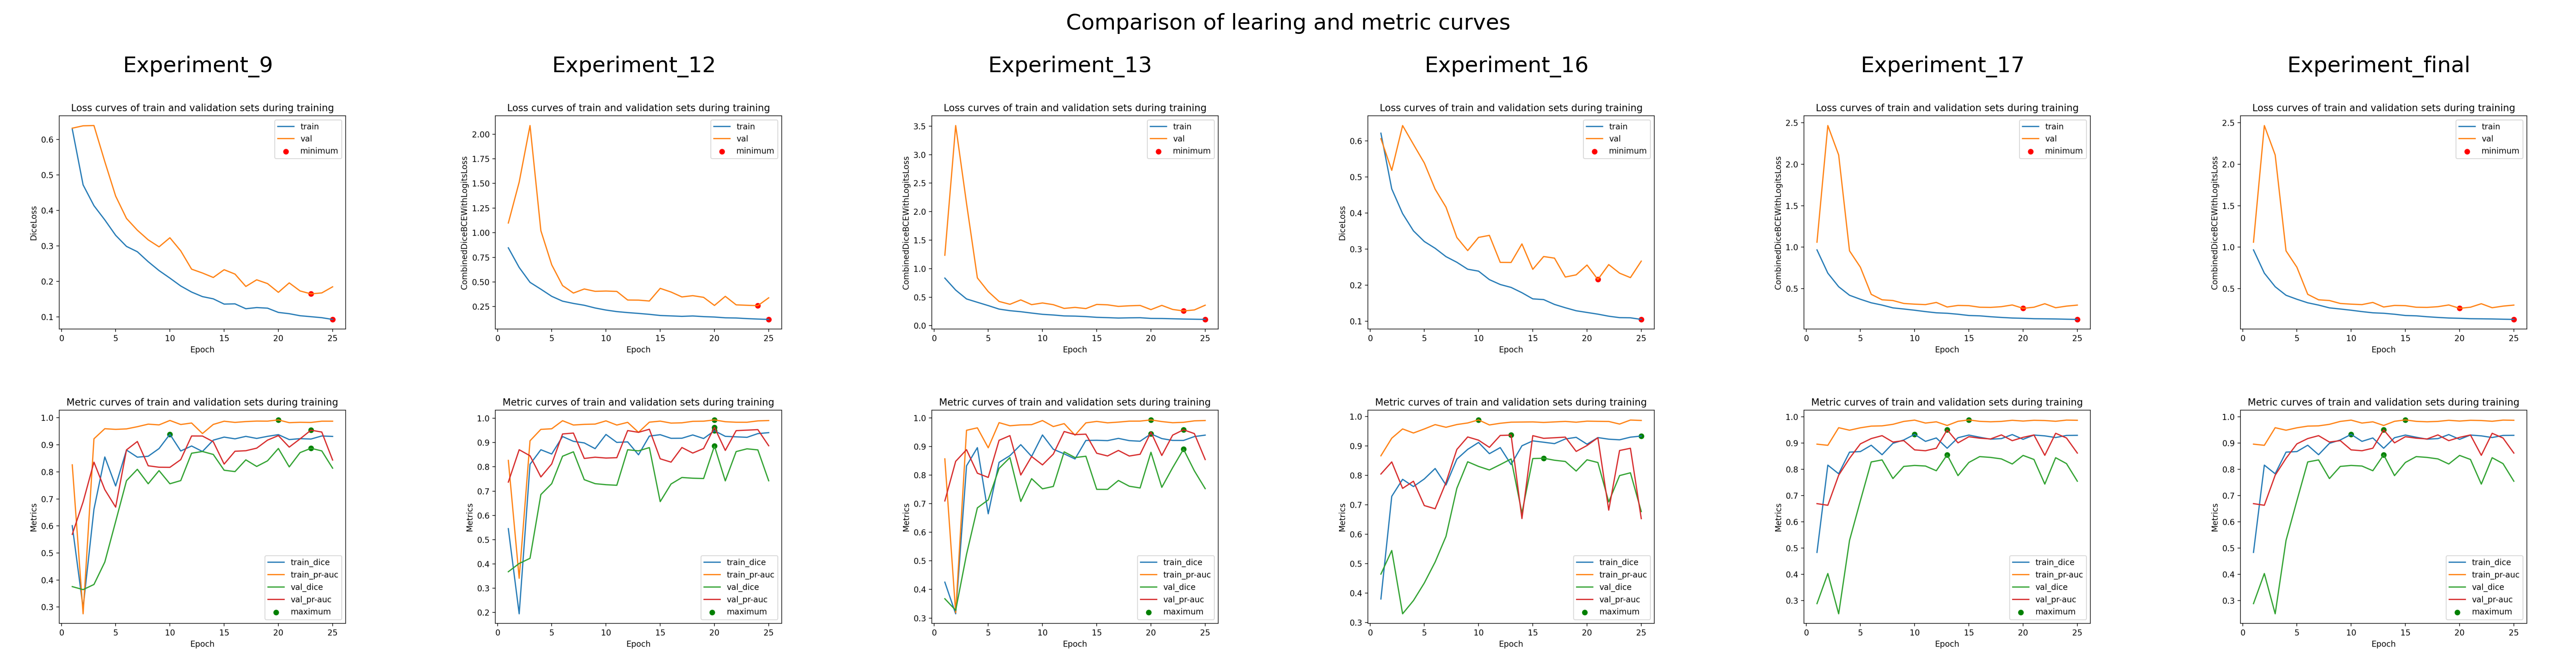

In [47]:
# plot loss curves
experiments = [9, 12, 13, 16, 17, 'final (experiment_17)']
fig, axes = plt.subplots(2, len(experiments), figsize=(20, 5), constrained_layout=True)
fig.set_dpi(300)
for i, experiment in enumerate(experiments):
  axes[0][i].imshow(mpimg.imread(LOG_ROOT_DIR / f'experiment_{experiment}' / 'loss_curves.png'))
  axes[0][i].set_axis_off()
  axes[0][i].set_title(f'Experiment_{experiment}')

  axes[1][i].imshow(mpimg.imread(LOG_ROOT_DIR / f'experiment_{experiment}' / 'metric_curves.png'))
  axes[1][i].set_axis_off()
fig.suptitle('Comparison of learning and metric curves')

In [49]:
fig.savefig(LOG_ROOT_DIR / 'comparison_curves.png', dpi=500)